In [205]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt

np.random.seed(1)

In [206]:
def equalProb():
    if np.random.random() < 0.5:
        return 0
    else:
        return 1

def boundedNormal(bound, stddev):
    rNum = np.random.normal(0, stddev)
    while rNum < -bound or rNum > bound:
        rNum = np.random.normal(0, stddev)
    return rNum

In [207]:
def gen_data_one():
    """This Function Generates Data Set 1"""
    center1 = 10
    center2 = 20
    center3 = 30
    bound = 4
    stddev = 2

    tuples = []
    numTuples = 1000

    for i in range(numTuples):
        rNum = np.random.randint(3)
        if rNum == 0:
            # candidate = 0
            rNum = boundedNormal(bound, stddev)
            a1 = center1 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center1 + rNum

        elif rNum == 1:
            candidate = 1
            rNum = boundedNormal(bound+10, stddev+10)
            a1 = center2 + rNum
            rNum = boundedNormal(bound+5, stddev+5)
            a2 = center2 + rNum + 5

        else:
            candidate = 2
            rNum = boundedNormal(bound+4, stddev)
            a1 = center3 + rNum
            rNum = boundedNormal(bound+2, stddev)
            a2 = center3 + rNum

        atuple = (a1, a2)
        tuples.append(atuple)

    df = pd.DataFrame(tuples, columns=["a1", "a2"])
    return df

In [208]:
def gen_data_two():
    """This Function Generates Data Set 2"""
    center1 = 15
    center2 = 15
    center3 = 15
    bound = 25
    stddev = 2

    tuples = []
    numTuples = 1000

    for i in range(numTuples):
        rNum = np.random.randint(3)
        if rNum == 0:
            # candidate = 0
            rNum = boundedNormal(bound, stddev)
            a1 = center1 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center1 + rNum

        elif rNum ==1:
            # candidate = 1
            rNum = boundedNormal(bound, stddev)
            a1 = center2 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center2 + rNum

        else:
            # candidate = 2
            rNum =boundedNormal(bound, stddev)
            a1 = center3 + rNum
            rNum = boundedNormal(bound, stddev)
            a2 = center3 + rNum

        atuple = (a1, a2)
        tuples.append(atuple)

    df = pd.DataFrame(tuples, columns=["a1", "a2"])
    return df

In [209]:
def plot_clustering(theData, kmeansLabels, brcLabels, aggLabels, dbLabels,graph_title):
    fig, ax = plt.subplots(2,2)

    # Plotting Kmeans
    for i in range(len(theData)):
        theColor = None
        if kmeansLabels[i] == 0: theColor= "red"
        if kmeansLabels[i] == 1: theColor= "green"
        if kmeansLabels[i] == 2: theColor= "blue"
        ax[0,0].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
        ax[0,0].set_title("kmeans")

    # Plotting Birch
    for i in range(len(theData)):
        if brcLabels[i] == 0: theColor = "blue"
        if brcLabels[i] == 1: theColor = "red"
        if brcLabels[i] == 2: theColor = "green"
        ax[0,1].scatter(theData[i][0], theData[i][1], s=9.5, alpha=1.0, color=theColor)
        ax[0,1].set_title("birch")

    # Plotting Agglomerative
    for i in range(len(theData)):
        if aggLabels[i] == 0: theColor = "red"
        if aggLabels[i] == 1: theColor = "green"
        if aggLabels[i] == 2: theColor = "blue"
        ax[1, 0].scatter(theData[i][0], theData[i][1], s=9.5, color=theColor)
        ax[1, 0].set_title("Agglomerative")

    # Plotting DBScan
    for i in range(len(theData)):
        if dbLabels[i] ==0: theColor = "red"
        elif dbLabels[i] == 1: theColor = "green"
        elif dbLabels[i] == 2: theColor = "blue"
        else: theColor = "pink"
        ax[1, 1].scatter(theData[i][0], theData[i][1], s= 9.5, alpha=1.0, color=theColor)
        ax[1, 1].set_title("DBScan")

    fig.tight_layout()
    fig.suptitle(graph_title)
    fig.subplots_adjust(top=0.88)
    plt.figure(figsize=(7, 5))
    plt.show()

In [210]:
def create_graph(df_in, title):
    """This Function Goes through and creates the clustring graphs out of the data shown"""
    df = df_in.copy()
    numClusters= 3
    theData = df.to_numpy()

    # kMeans
    kmeans = KMeans(n_clusters=numClusters, random_state=0).fit(df)

    # Birch
    brc = Birch(n_clusters=numClusters).fit(df)

    # Agglomerative
    agg = AgglomerativeClustering(n_clusters=numClusters, linkage="ward").fit(df)

    # DBSCAN
    db = DBSCAN(eps=1.5, min_samples=4).fit(df)

    plot_clustering(theData, kmeans.labels_, brc.labels_, agg.labels_, db.labels_, title)

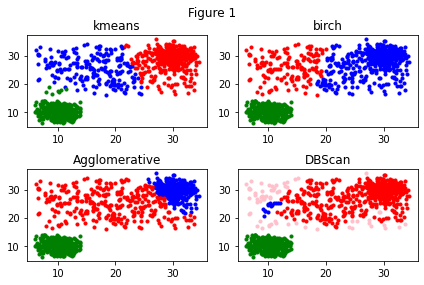

<Figure size 504x360 with 0 Axes>

In [211]:
df1 = gen_data_one()
create_graph(df1, "Figure 1")

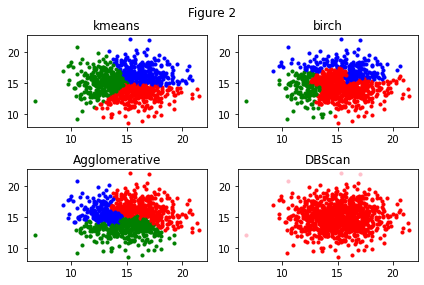

<Figure size 504x360 with 0 Axes>

In [212]:
df2 = gen_data_two()
create_graph(df2, "Figure 2")

### Objective
Upload a pdf file containing a write up describing one or two data sets, the 4-chart visualization that shows they
result in different clusterings, and an explanation of WHY the different Clusters.


For this assignment the amount of N clusters is 3.

### K-means
K- Means starts by clustering the data into 3 clusters. A random n centroids are selected
and then the data is parsed through and each point is then assigned to the cluster in which the centroid it
is closest to. The mean of the n clusters is then calculated and theses are assigned as the new centroids.
The algrorithm then repeats this processes until the centroids stabilize.

In Figure two this creates an even "pie" diagram. Where the clusters all look to be about equal size. In
Figure 1 we end up with three clusters, one being the centralized in the lower left corner on in the upper right
corner and the middle diagram. As the algorithm works through Figure 1. The center of the points are pulling the data
in closer to the center of each color group.


### Agglomerative
The Agglomerative algorithm is a bit of the inverse of the K-means. All the points are considered their own clusters
And then they are joined to the clusters that are closes to them. The Algorithm uses the bottom up approach using
the 'ward' linkage. Each of the new joined clusters gets a centroid and the new clusters are then joined based on
clusters that are closest. It is for this reason that we see in Figure one the grouping of blue in the upper right,
green in the lower left, and the red all joined. The Blue and Green have close clusters and draw the points in toward
those centroids, where red is more dispersed. In Figure two the algorithm is simular in splitting to Kmeans, but it
slightly shifts based on the distances between the points from the starting selection leading to three clusters that
are not as evenly distributed as Kmeans.

### Birch
Birch Stands for Balanced Iterative Reducing and Clustering using Hierarchies. It is an algorithm that can clusters
data by first summarizing large data sets into smaller, dense clusters known as Clustering Features where there are
N number of data points in the luster and the linear sum of these data points where the squared sum of the data points
is then clustered.  It is for this reason that we see a difference between Birch and K mean in Figure 1. Birch has
a more evenly spread of the Blue and Red clusters, and a tight cluster on the green. It tries to create more even
clusters.  A CF tree is a tree where each leaf node contains a sub-cluster. Every entry in a CF tree contains a pointer to a
child node and a CF entry made up of the sum of CF entries in the child nodes. There is a maximum number of entries
in each leaf node. This maximum number is called the threshold

In figure 2 The Red cluster joins the closest points in the middle an builds outward toward the bottom of the graph.
Where the Green and Blue start with clusters to the side of the red center and build outward. The algorithm
minimize linear sum and the quadratic sums. It is for this reason the algorithm does not do well with cigar type shapes.


### dbscan
DBScan stands for Density-based spatial clustering with noise. The alogrithm assumes the data is spherical.
The two main features are minpoints and EPS. The minpoints is based off the size of the data set and the eps
defines the neighborhood around a data point. If the distance between two points is lower than eps they are considered
neighbors. The algorithm starts with large clusters and then adds data to those clusters. In Figure 2 this leads to there
being only one main cluster red, with a few outliers in pink. In Figure 1 this leads to three clusters. The main green
cluster in the lower left, and a main cluster in the upper right that drifts outwards. There is a small cluster of blue
that originates in this data set as well as it the dispearsed red points move further away from their center. The red
is able to spread toward the left because the DBscan algorithm allows for some more noise in the data set.
